# Confused Student - EEG Signal Analysis

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model  
from tensorflow.keras.utils import plot_model

In [ ]:
# Loading dataset

df = pd.read_csv("EEG_data.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [ ]:
# !pip install pandas_profiling

In [ ]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [ ]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [ ]:
df.isna().sum()

SubjectID             0
VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
dtype: int64

- Mediation and attention have some values as zero which doesn't make sense at all. So we can remove the specific rows. The SubjectID and VideoID indicate details which are not related to the EGG brainwave. These features will overfit the model. The 'predefinedlabel' label indicates which confusion state was supposed to be detected by the experiment conductor prior to the test. We can remove that feature too.

In [ ]:
# Removing features SubjectID, VideoID and predefined
df.drop(columns = {"SubjectID" , "VideoID" , "predefinedlabel"}, axis = 1, inplace=True)

In [ ]:
# # Correlation among the features

# plt.figure(figsize = (12,12))
# cov = df1.corr()
# sns.heatmap(cov, annot=True)

In [ ]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [ ]:
# Calculating the number of rows having 0 for meditation and attention

countmed = df[df["Mediation"] == 0].shape[0]
countatten = df[df["Attention"] == 0].shape[0]

print("For meditation data {} number of rows having 0".format(countmed))
print("For meditation data {} number of rows having 0".format(countatten))

For meditation data 1423 number of rows having 0
For meditation data 1423 number of rows having 0


In [ ]:
# Removing the rows

df = df[df["Mediation"] > 0]
df = df[df["Attention"] > 0]
df

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0


In [ ]:
# Re-indexing

df.reset_index()
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


- We create dummy variables for the ethnicity feature and gender feature inorder to keep them for training the model

In [ ]:
df["user-definedlabeln"].value_counts()

1.0    5925
0.0    5463
Name: user-definedlabeln, dtype: int64

In [ ]:
# Rename some of the features for the simplicity

df.rename(columns = {"user-definedlabeln" : "user-defined_label"}, inplace =True)

In [ ]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-defined_label
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


### Visualizing the Distribution

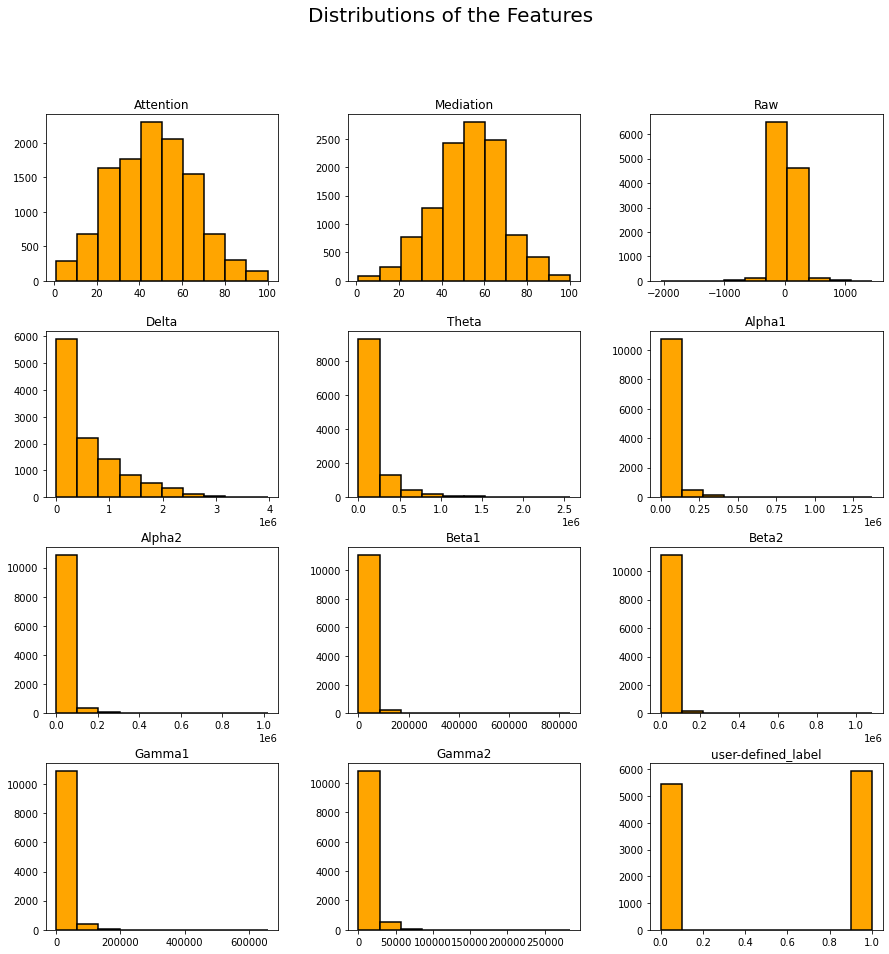

In [ ]:
df.hist(figsize = (15,15), grid = False, color = "orange", edgecolor = 'black', linewidth=1.5 )
plt.suptitle('Distributions of the Features', fontsize = 20)
plt.show()

- Before fitting the data to our model, we should normalize the feature values.

### Normalizing the dataset

- We may seperate the dataset with input features and the output feature, userDefinedLabels

In [ ]:
X = df.loc[:, df.columns != "user-defined_label"]
Y = df[["user-defined_label"]]
Y

,user-defined_label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12806,0.0
12807,0.0
12808,0.0
12809,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index)

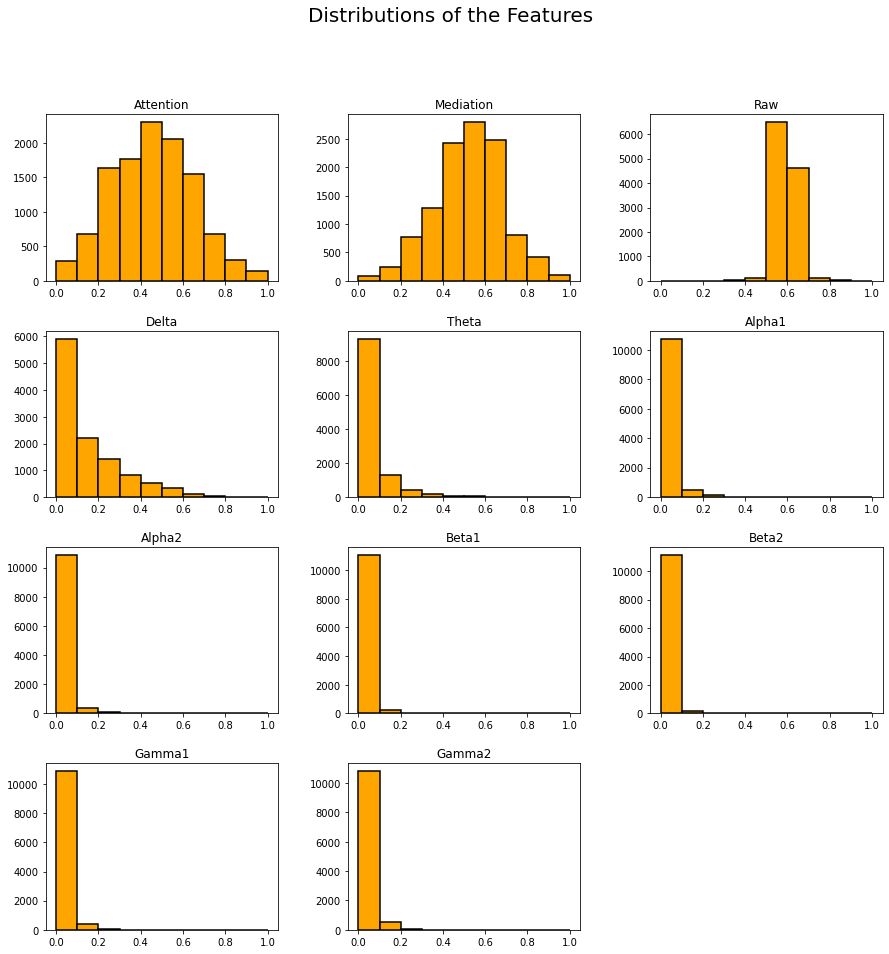

In [ ]:
X.hist(figsize = (15,15), grid = False, color = "orange", edgecolor = 'black', linewidth=1.5 )
plt.suptitle('Distributions of the Features', fontsize = 20)
plt.show()

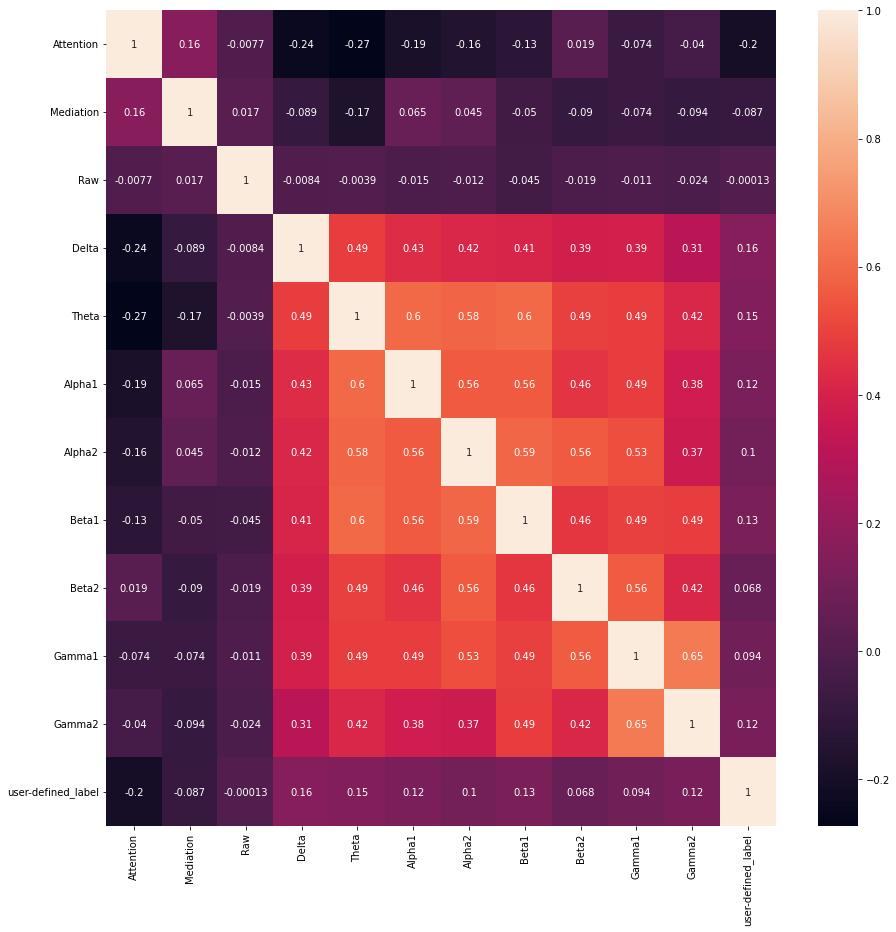

In [ ]:
plt.figure(figsize = (15,15))
cor = df.corr()
sns.heatmap(cor, annot=True)

### Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391],
           dtype='int64', length=7971)

## 1D-CNN

### Defining the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [ ]:
# Defining the model
def Model_CNN():
    
    model = Sequential()
    model.add(Conv1D(64, 2, activation="tanh", input_shape=(11,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
#     model = Sequential()
#     model.add(Conv1D(15, kernel_size=2, input_shape=(11,1)))
#     model.add(Flatten())
#     model.add(Dense(8, 'tanh'))
#     model.add(Dense(1, 'sigmoid'))

    model.summary()
    
    return model

In [ ]:
def com_model(model):
    model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

### Testing Accuracy

In [ ]:
def plot_acc(history, epochs):
    plt.figure(figsize=(12, 8))

    plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
    plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

    plt.xlabel("Epoch")
    plt.ylabel("Acuracy")
    plt.title("Accuracy Over Time")
    plt.legend()

    plt.show()

In [ ]:
def plot_conf(cm):
    plt.figure(figsize=(8, 8))
    group_names = ['True Zero','False One','False Zero','True One']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Zero','One'])
    ax.yaxis.set_ticklabels(['Zero','One'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
def get_pred(pred):
    k = 0
    y_pred = np.zeros(len(pred))
    for i in pred:
        if i>=0.5:
            y_pred[k] = 1.0
        else:
            y_pred[k] = 0.0
        k = k+1
    return y_pred

### Training the model with K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(Y_train)
y_test_one_hot = to_categorical(Y_test)

In [ ]:
y_test_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
x = X_train.values
y = Y_train.values

[   0    1    2 ... 7968 7969 7970]
Fold #1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 10, 64)            192       
                                                                 
 batch_normalization_1 (Batc  (None, 10, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (

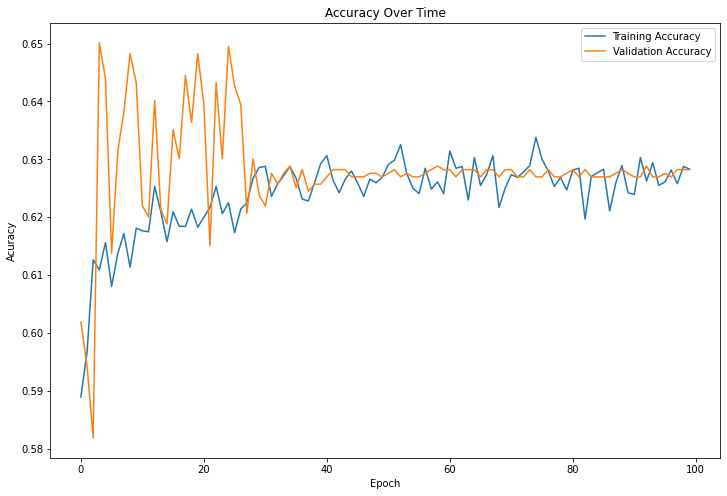

Loss: 0.6338132619857788  Accuracy: 0.6282131671905518
[   1    2    3 ... 7968 7969 7970]
Fold #2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 10, 64)            192       
                                                                 
 batch_normalization_2 (Batc  (None, 10, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                     

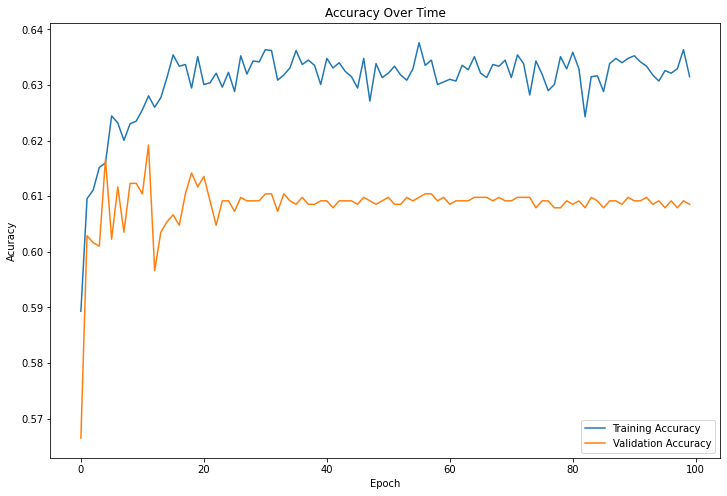

Loss: 0.6572028994560242  Accuracy: 0.6085320115089417
[   0    1    2 ... 7967 7969 7970]
Fold #3
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 10, 64)            192       
                                                                 
 batch_normalization_3 (Batc  (None, 10, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                     

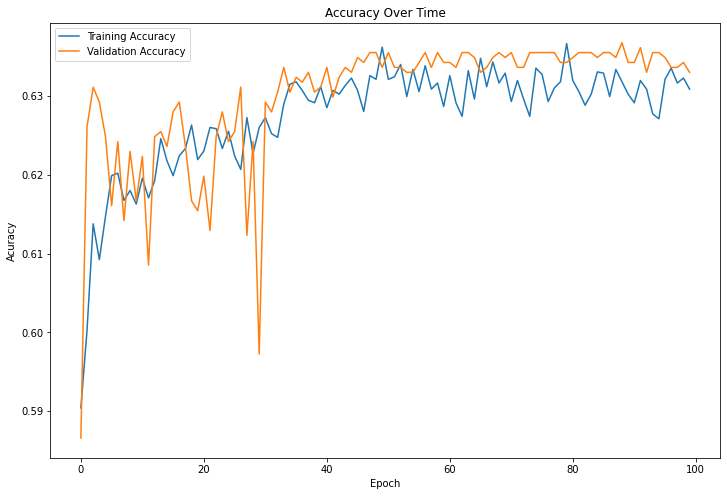

Loss: 0.6444409489631653  Accuracy: 0.6329987645149231
[   0    3    4 ... 7965 7968 7969]
Fold #4
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10, 64)            192       
                                                                 
 batch_normalization_4 (Batc  (None, 10, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten_4 (Flatten)         (None, 320)               0         
                     

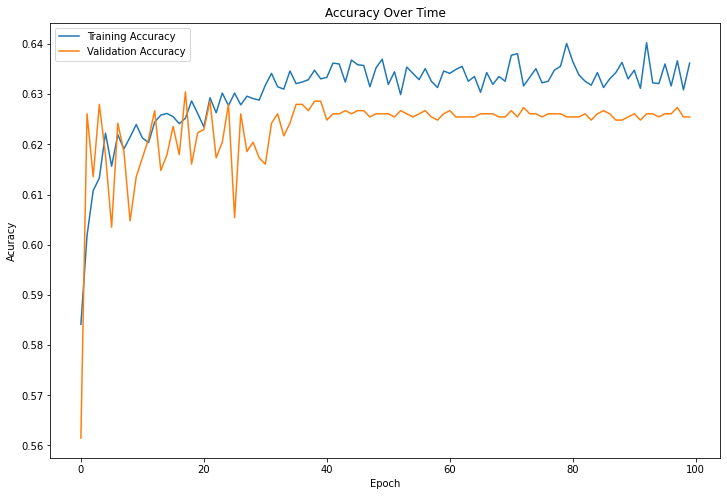

Loss: 0.6504581570625305  Accuracy: 0.6254705190658569
[   0    1    2 ... 7967 7968 7970]
Fold #5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 10, 64)            192       
                                                                 
 batch_normalization_5 (Batc  (None, 10, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 flatten_5 (Flatten)         (None, 320)               0         
                     

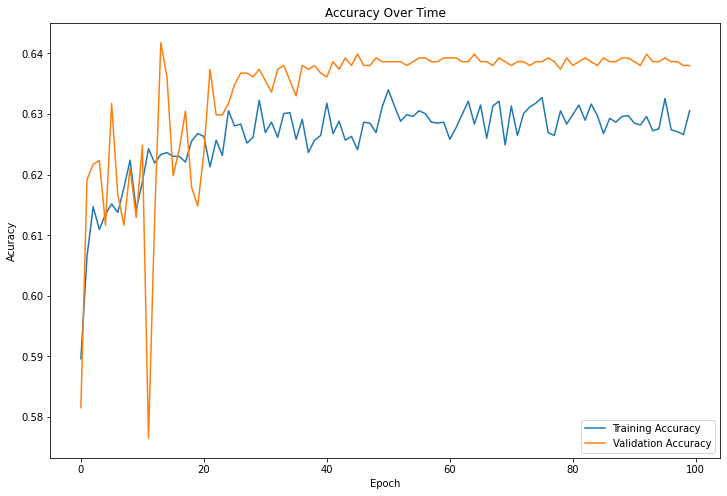

Loss: 0.6510139107704163  Accuracy: 0.6380175948143005


In [ ]:
fold = 0
lossf = np.zeros(5)
accu = np.zeros(5)

for train, test in cv.split(x):
    fold+=1
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Model_CNN()
    
    com_model(model)
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=100, verbose=2, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])
    
    acc = model.evaluate(x_test, y_test)
    
    lossf[fold-1] = acc[0]
    accu[fold-1] = acc[1]
    
    plot_acc(history, 100)
    
    print("Loss:", acc[0], " Accuracy:", acc[1])

### Evaluating the Model

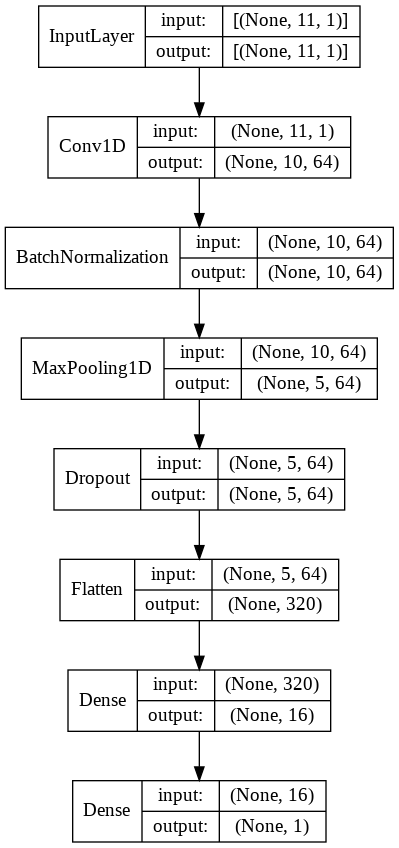

In [ ]:
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
def folds_accu(accu):
    print('Accuracy of 5 Folds : ',accu)

    A = [1, 2, 3, 4, 5]
    B = []
    for i in accu:
        B.append(i)
    
    plt.figure(figsize = (10,6))

    sns.barplot(A, B)

    plt.xlabel("Fold")
    plt.ylabel("Acuracy")
    plt.title("Accuracy Over Time")
    plt.legend()

    plt.show()

In [ ]:
def conf_matrix(model):
    pred = model.predict(X_test.values)
    y_pred = get_pred(pred)
    cm = confusion_matrix(Y_test, y_pred)    
    print(cm)
    
    plot_conf(cm)
    return cm

In [ ]:
def calculate_metrics(cm):
    corr = np.diag(cm)
    false_pos = np.diag(cm, 1)
    false_neg = np.diag(cm, -1)
    true_pos = np.sum(cm, axis=1) - false_neg
    true_neg = np.sum(cm, axis=0) - false_pos
    
    precision = np.sum(true_pos / (true_pos + false_pos))
    recall = np.sum(true_pos / (true_pos + false_neg))
    f1score = 2*((precision*recall)/precision+recall)
    accur = (tree_pos + true_neg) / (false_pos + false_neg + true_pos + true_neg)
    
    print("Precision : ", precision)
    print("Recall : ", recall)
    print("F1-Score : ", f1score)
    print("Accuracy : ", accur)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy of 5 Folds :  [0.62821317 0.60853201 0.63299876 0.62547052 0.63801759]


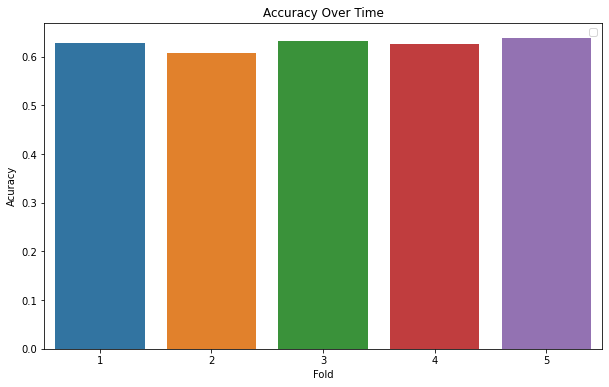

In [ ]:
folds_accu(accu)

107/107 [==============================] - 0s 995us/step
[[ 613 1154]
 [ 295 1355]]


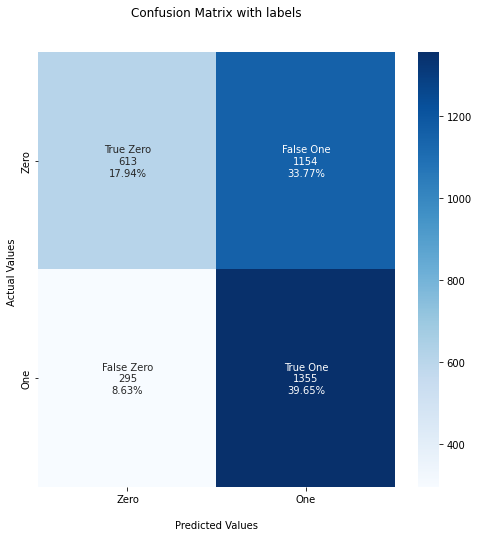

In [ ]:
cm = conf_matrix(model)

In [ ]:
calculate_metrics(cm)

Precision :  0.5400557991231566
Recall :  0.8212121212121212
F1-Score :  0.6515989420533781
Accuracy :  0.5759438103599649


## ANN

### Defining the Model

In [ ]:
# Defining the model
def Model_ANN(h1, h2, h3, h4):
    
    model = Sequential()
    model.add(Input(shape= (11,)))
    model.add(Dense(h1, activation='tanh'))
    model.add(Dense(h2, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(h3, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(h4, activation='tanh'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()
    
    return model

### Traing with 5 Fold Cross Validation

[   0    1    2 ... 7968 7969 7970]
Fold #1
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                384       
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_44 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_12 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 16)                272       
         

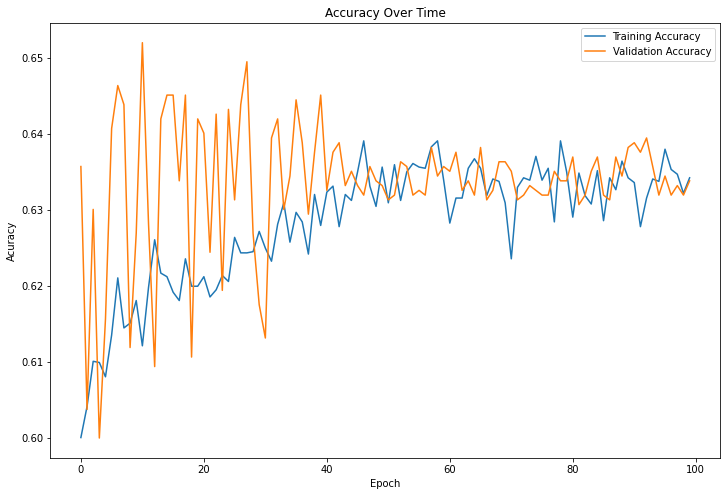

Loss: 0.6276789307594299  Accuracy: 0.6338558197021484


In [ ]:
fold = 0
lossf = np.zeros(5)
accu = np.zeros(5)
one = 32
two = 16
three = 16
four = 16

for train, test in cv.split(x):
    fold+=1
    if fold>=2:
      break
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Model_ANN(one, two, three, four)
    
    com_model(model)
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=100, verbose=2, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])
    
    acc = model.evaluate(x_test, y_test)
    
    lossf[fold-1] = acc[0]
    accu[fold-1] = acc[1]
    
    plot_acc(history, 100)
    
    print("Loss:", acc[0], " Accuracy:", acc[1])

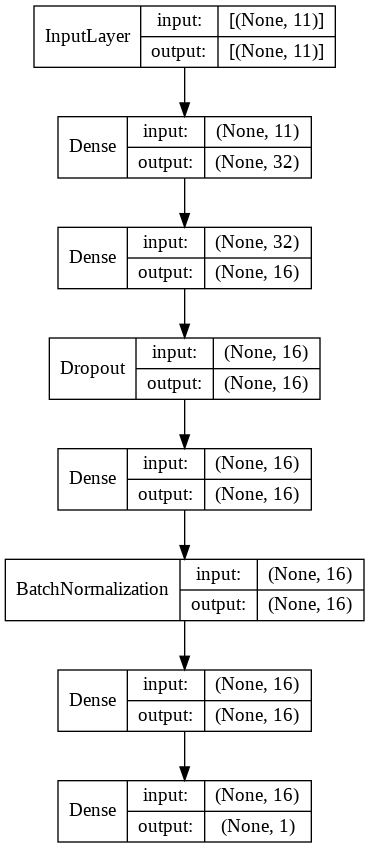

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

### Evaluating the Model

C:\Users\januk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


Accuracy of 5 Folds :  [0.60940439 0.57277292 0.55959851 0.55583435 0.55144292]


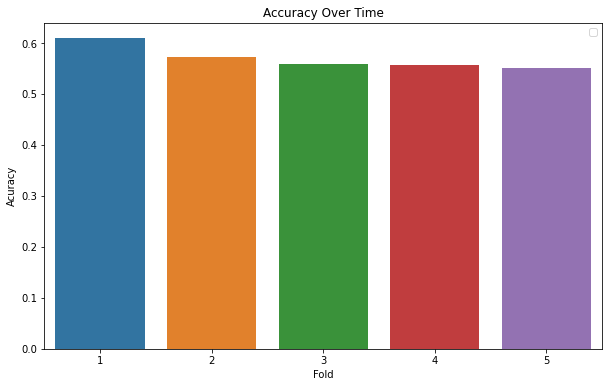

In [ ]:
folds_accu(accu)

107/107 [==============================] - 0s 872us/step
[[ 834  933]
 [ 481 1169]]


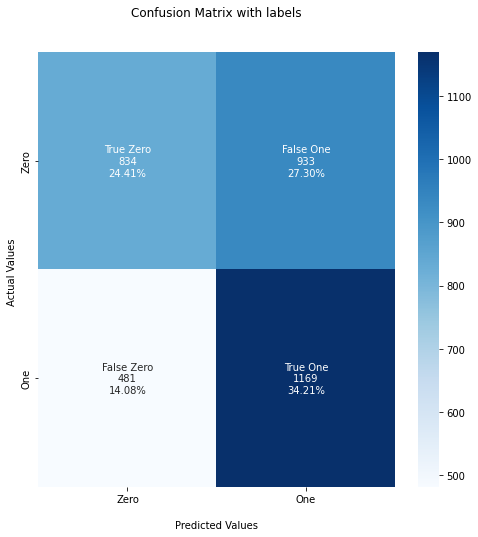

In [ ]:
cm = conf_matrix(model)

In [ ]:
calculate_metrics(cm)

Precision :  0.5561370123691722
Recall :  0.7084848484848485
F1-Score :  0.6231343283582089
Accuracy :  0.5861867134913668


### 1D CNN - DecisionTree

In [ ]:
from keras.models import Model
# Defining the Feature Extractor
fe = Sequential()
fe.add(Conv1D(64, 2, activation="tanh", input_shape=(11,1)))
fe.add(BatchNormalization())
fe.add(Conv1D(16, 2, activation="tanh", input_shape=(11,1)))
fe.add(BatchNormalization())
fe.add(MaxPooling1D())
fe.add(Flatten())

In [ ]:
xx = fe.output
xx = Dense(16, activation='tanh')(xx)
predlayer = Dense(1, activation='sigmoid')(xx)

In [ ]:
model = Model(inputs=fe.input, outputs=predlayer)
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7ff09749dd50>>

[   0    1    2 ... 7968 7969 7970]
Fold #1
Epoch 1/100
399/399 - 2s - loss: 0.6667 - accuracy: 0.5991 - val_loss: 0.6510 - val_accuracy: 0.6408 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 2/100
399/399 - 1s - loss: 0.6603 - accuracy: 0.6066 - val_loss: 0.6361 - val_accuracy: 0.6364 - lr: 0.0010 - 698ms/epoch - 2ms/step
Epoch 3/100
399/399 - 1s - loss: 0.6581 - accuracy: 0.6103 - val_loss: 0.6428 - val_accuracy: 0.6144 - lr: 0.0010 - 753ms/epoch - 2ms/step
Epoch 4/100
399/399 - 1s - loss: 0.6550 - accuracy: 0.6161 - val_loss: 0.6399 - val_accuracy: 0.6357 - lr: 0.0010 - 699ms/epoch - 2ms/step
Epoch 5/100
399/399 - 1s - loss: 0.6538 - accuracy: 0.6151 - val_loss: 0.6323 - val_accuracy: 0.6376 - lr: 0.0010 - 688ms/epoch - 2ms/step
Epoch 6/100
399/399 - 1s - loss: 0.6536 - accuracy: 0.6222 - val_loss: 0.6406 - val_accuracy: 0.6219 - lr: 0.0010 - 688ms/epoch - 2ms/step
Epoch 7/100
399/399 - 1s - loss: 0.6529 - accuracy: 0.6136 - val_loss: 0.6336 - val_accuracy: 0.6357 - lr: 0.0010 - 743ms/epo

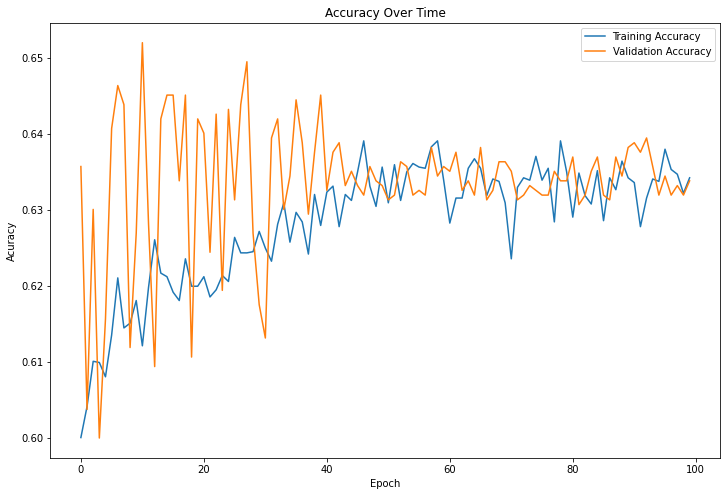

Loss: 0.6298554539680481  Accuracy: 0.6351097226142883
[   1    2    3 ... 7968 7969 7970]
Fold #2
Epoch 1/100
399/399 - 1s - loss: 0.6286 - accuracy: 0.6412 - val_loss: 0.6366 - val_accuracy: 0.6299 - lr: 1.0000e-11 - 792ms/epoch - 2ms/step
Epoch 2/100
399/399 - 1s - loss: 0.6296 - accuracy: 0.6384 - val_loss: 0.6366 - val_accuracy: 0.6286 - lr: 1.0000e-11 - 752ms/epoch - 2ms/step
Epoch 3/100
399/399 - 1s - loss: 0.6285 - accuracy: 0.6389 - val_loss: 0.6366 - val_accuracy: 0.6286 - lr: 1.0000e-11 - 699ms/epoch - 2ms/step
Epoch 4/100
399/399 - 1s - loss: 0.6294 - accuracy: 0.6398 - val_loss: 0.6366 - val_accuracy: 0.6299 - lr: 1.0000e-11 - 754ms/epoch - 2ms/step
Epoch 5/100
399/399 - 1s - loss: 0.6286 - accuracy: 0.6411 - val_loss: 0.6365 - val_accuracy: 0.6292 - lr: 1.0000e-11 - 772ms/epoch - 2ms/step
Epoch 6/100
399/399 - 1s - loss: 0.6293 - accuracy: 0.6374 - val_loss: 0.6366 - val_accuracy: 0.6299 - lr: 1.0000e-11 - 750ms/epoch - 2ms/step
Epoch 7/100
399/399 - 1s - loss: 0.6288 - a

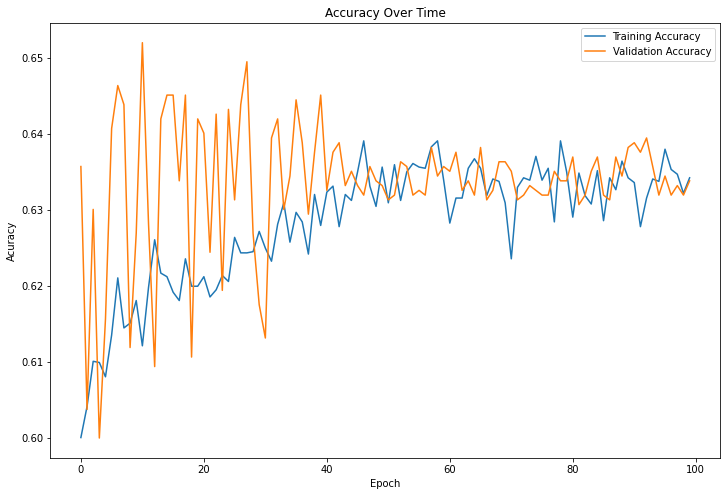

Loss: 0.6364847421646118  Accuracy: 0.6286072731018066
[   0    1    2 ... 7967 7969 7970]
Fold #3
Epoch 1/100
399/399 - 1s - loss: 0.6315 - accuracy: 0.6348 - val_loss: 0.6269 - val_accuracy: 0.6487 - lr: 1.0000e-20 - 747ms/epoch - 2ms/step
Epoch 2/100
399/399 - 1s - loss: 0.6313 - accuracy: 0.6360 - val_loss: 0.6269 - val_accuracy: 0.6499 - lr: 1.0000e-20 - 768ms/epoch - 2ms/step
Epoch 3/100
399/399 - 1s - loss: 0.6325 - accuracy: 0.6363 - val_loss: 0.6269 - val_accuracy: 0.6487 - lr: 1.0000e-20 - 748ms/epoch - 2ms/step
Epoch 4/100
399/399 - 1s - loss: 0.6313 - accuracy: 0.6373 - val_loss: 0.6269 - val_accuracy: 0.6499 - lr: 1.0000e-20 - 703ms/epoch - 2ms/step
Epoch 5/100
399/399 - 1s - loss: 0.6315 - accuracy: 0.6340 - val_loss: 0.6270 - val_accuracy: 0.6487 - lr: 1.0000e-20 - 765ms/epoch - 2ms/step
Epoch 6/100
399/399 - 1s - loss: 0.6302 - accuracy: 0.6370 - val_loss: 0.6270 - val_accuracy: 0.6493 - lr: 1.0000e-20 - 751ms/epoch - 2ms/step
Epoch 7/100
399/399 - 1s - loss: 0.6316 - a

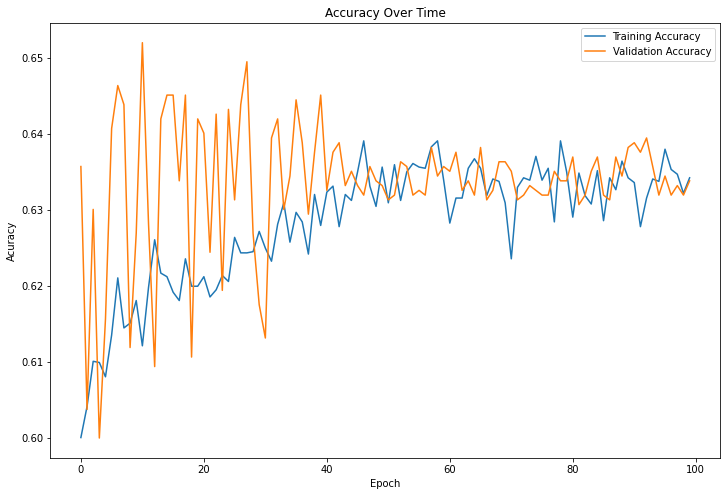

Loss: 0.62692791223526  Accuracy: 0.6493099331855774
[   0    3    4 ... 7965 7968 7969]
Fold #4
Epoch 1/100
399/399 - 1s - loss: 0.6306 - accuracy: 0.6376 - val_loss: 0.6280 - val_accuracy: 0.6368 - lr: 1.0000e-29 - 786ms/epoch - 2ms/step
Epoch 2/100
399/399 - 1s - loss: 0.6312 - accuracy: 0.6395 - val_loss: 0.6279 - val_accuracy: 0.6380 - lr: 1.0000e-29 - 762ms/epoch - 2ms/step
Epoch 3/100
399/399 - 1s - loss: 0.6311 - accuracy: 0.6392 - val_loss: 0.6279 - val_accuracy: 0.6380 - lr: 1.0000e-29 - 694ms/epoch - 2ms/step
Epoch 4/100
399/399 - 1s - loss: 0.6317 - accuracy: 0.6365 - val_loss: 0.6279 - val_accuracy: 0.6380 - lr: 1.0000e-29 - 743ms/epoch - 2ms/step
Epoch 5/100
399/399 - 1s - loss: 0.6313 - accuracy: 0.6363 - val_loss: 0.6279 - val_accuracy: 0.6380 - lr: 1.0000e-29 - 751ms/epoch - 2ms/step
Epoch 6/100
399/399 - 1s - loss: 0.6308 - accuracy: 0.6384 - val_loss: 0.6280 - val_accuracy: 0.6361 - lr: 1.0000e-29 - 748ms/epoch - 2ms/step
Epoch 7/100
399/399 - 1s - loss: 0.6317 - acc

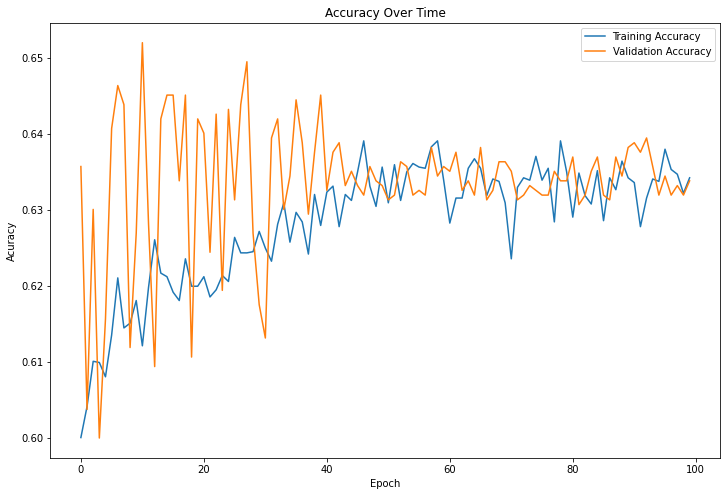

Loss: 0.6278988718986511  Accuracy: 0.6380175948143005
[   0    1    2 ... 7967 7968 7970]
Fold #5
Epoch 1/100
399/399 - 1s - loss: 0.6318 - accuracy: 0.6351 - val_loss: 0.6278 - val_accuracy: 0.6393 - lr: 1.0000e-38 - 745ms/epoch - 2ms/step
Epoch 2/100
399/399 - 1s - loss: 0.6311 - accuracy: 0.6354 - val_loss: 0.6278 - val_accuracy: 0.6393 - lr: 1.0000e-38 - 772ms/epoch - 2ms/step
Epoch 3/100
399/399 - 1s - loss: 0.6316 - accuracy: 0.6353 - val_loss: 0.6278 - val_accuracy: 0.6393 - lr: 1.0000e-38 - 703ms/epoch - 2ms/step
Epoch 4/100
399/399 - 1s - loss: 0.6307 - accuracy: 0.6348 - val_loss: 0.6278 - val_accuracy: 0.6412 - lr: 1.0000e-38 - 764ms/epoch - 2ms/step
Epoch 5/100
399/399 - 1s - loss: 0.6316 - accuracy: 0.6365 - val_loss: 0.6278 - val_accuracy: 0.6399 - lr: 1.0000e-38 - 786ms/epoch - 2ms/step
Epoch 6/100
399/399 - 1s - loss: 0.6315 - accuracy: 0.6371 - val_loss: 0.6278 - val_accuracy: 0.6405 - lr: 1.0000e-38 - 751ms/epoch - 2ms/step
Epoch 7/100
399/399 - 1s - loss: 0.6310 - a

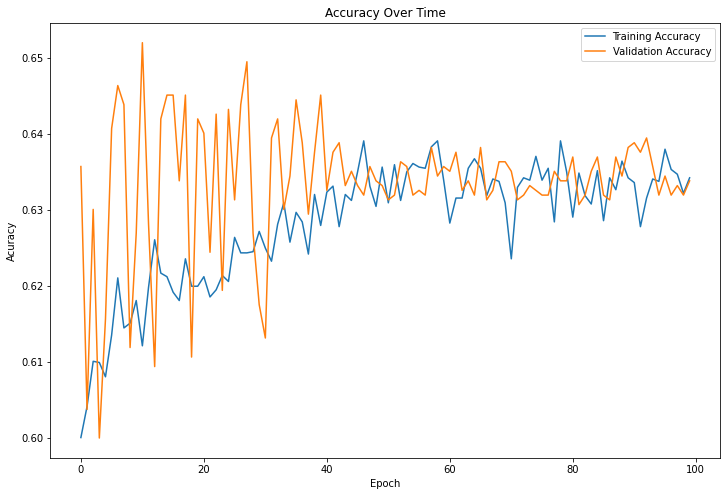

Loss: 0.627683162689209  Accuracy: 0.6398996114730835


In [ ]:
fold = 0
lossf = np.zeros(5)
accu = np.zeros(5)

for train, test in cv.split(x):
    fold+=1
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=100, verbose=2, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])
    
    acc = model.evaluate(x_test, y_test)
    
    lossf[fold-1] = acc[0]
    accu[fold-1] = acc[1]
    
    plot_acc(history, 100)
    
    print("Loss:", acc[0], " Accuracy:", acc[1])

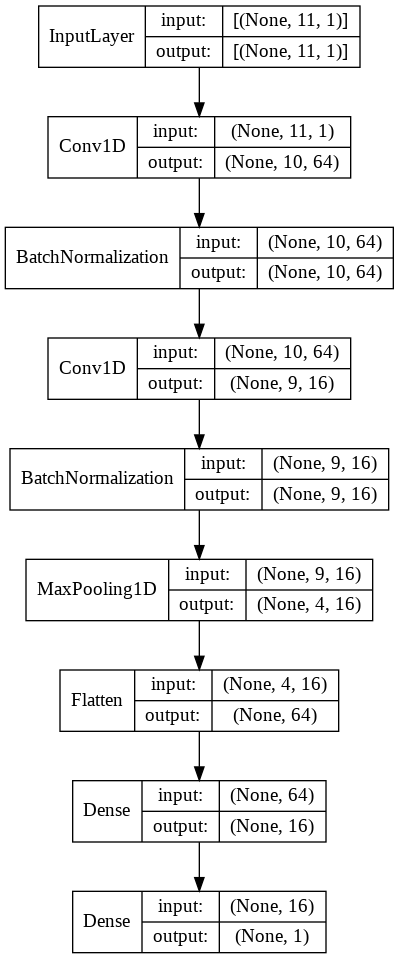

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

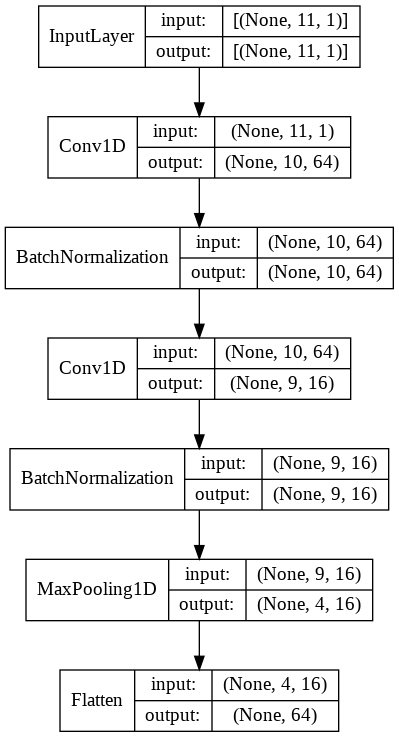

In [ ]:
plot_model(fe, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy of 5 Folds :  [0.63510972 0.62860727 0.64930993 0.63801759 0.63989961]


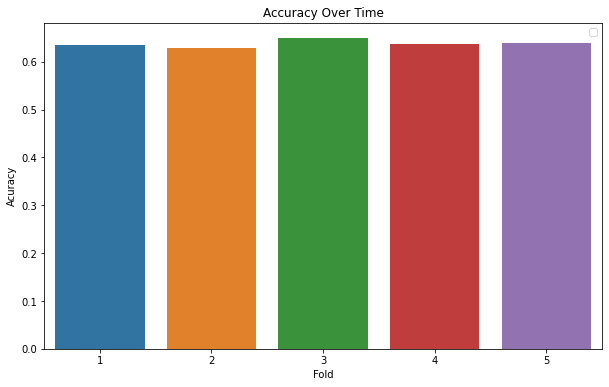

In [ ]:
folds_accu(accu)

In [ ]:
extracted_x = fe.predict(X_train.values)

250/250 [==============================] - 0s 1ms/step


In [ ]:
extracted_x.shape

(7971, 64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
fold = 0
accu = np.zeros(5)

for train, test in cv.split(x):
    fold+=1
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    extracted_x = fe.predict(x_train)
    
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

    clf.fit(extracted_x, y_train)

    extracted_x_test = fe.predict(x_test)

    y_pred = clf.predict(extracted_x_test)

    accu[fold-1] = metrics.accuracy_score(y_test, y_pred)


[   0    1    2 ... 7968 7969 7970]
Fold #1
50/50 [==============================] - 0s 1ms/step
[   1    2    3 ... 7968 7969 7970]
Fold #2
50/50 [==============================] - 0s 1ms/step
[   0    1    2 ... 7967 7969 7970]
Fold #3
50/50 [==============================] - 0s 1ms/step
[   0    3    4 ... 7965 7968 7969]
Fold #4
50/50 [==============================] - 0s 1ms/step
[   0    1    2 ... 7967 7968 7970]
Fold #5
50/50 [==============================] - 0s 1ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy of 5 Folds :  [0.63448276 0.59974906 0.62986198 0.59849435 0.60727729]


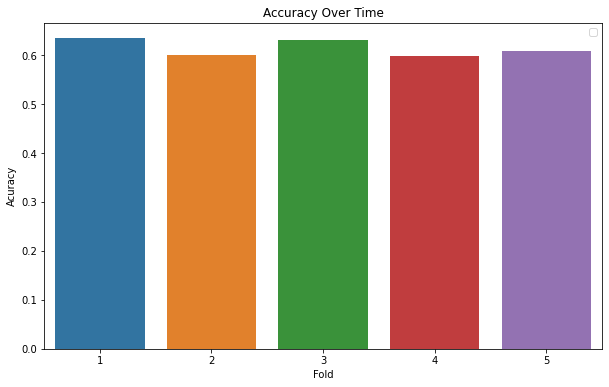

In [ ]:
folds_accu(accu)

In [ ]:
accu

array([0.63448276, 0.59974906, 0.62986198, 0.59849435, 0.60727729])

In [ ]:
y_pred = clf.predict(extracted_test_x)

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test.values, y_pred))

Accuracy: 0.5493122622183202


In [ ]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred2 = clf2.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred2))

Accuracy: 0.58852794849283


[[ 531 1236]
 [ 304 1346]]


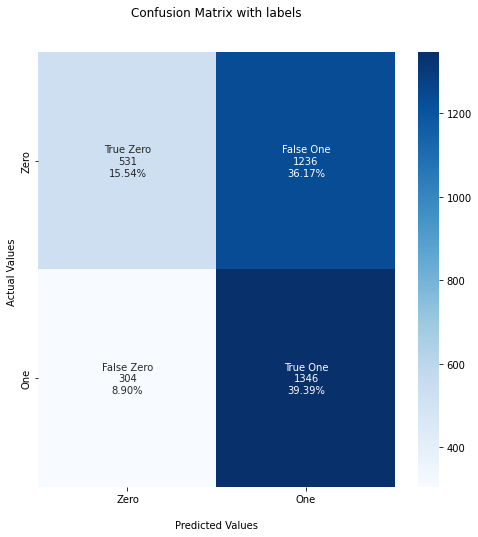

In [ ]:
cm = confusion_matrix(Y_test.values, y_pred)    
print(cm)
    
plot_conf(cm)

In [ ]:
calculate_metrics(cm)

Precision :  0.5213013168086754
Recall :  0.8157575757575758
F1-Score :  0.6361058601134215
Accuracy :  0.5493122622183202


In [ ]:
features = []
for i in df.columns:
    if i!='user-defined_label':
        features.append(i)

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf2, 
                   feature_names=features,  
                   class_names=['0','1'],
                   filled=True)

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-defined_label'],
      dtype='object')

## 1D-CNN + Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
fold = 0
accu = np.zeros(5)

for train, test in cv.split(x):
    fold+=1
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    extracted_x = fe.predict(x_train)
    
    clfl = LogisticRegression(random_state = 0)

    clfl.fit(extracted_x, y_train)

    extracted_x_test = fe.predict(x_test)

    y_pred = clfl.predict(extracted_x_test)

    accu[fold-1] = metrics.accuracy_score(y_test, y_pred)

[   0    1    2 ... 7968 7969 7970]
Fold #1
39/50 [======================>.......] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50/50 [==============================] - 0s 1ms/step
[   1    2    3 ... 7968 7969 7970]
Fold #2
 1/50 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50/50 [==============================] - 0s 1ms/step
[   0    1    2 ... 7967 7969 7970]
Fold #3
37/50 [=====================>........] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50/50 [==============================] - 0s 1ms/step
[   0    3    4 ... 7965 7968 7969]
Fold #4
36/50 [====================>.........] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50/50 [==============================] - 0s 1ms/step
[   0    1    2 ... 7967 7968 7970]
Fold #5
 1/50 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred = clfl.predict(extracted_test_x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy of 5 Folds :  [0.63134796 0.60476788 0.62923463 0.61919699 0.6336261 ]


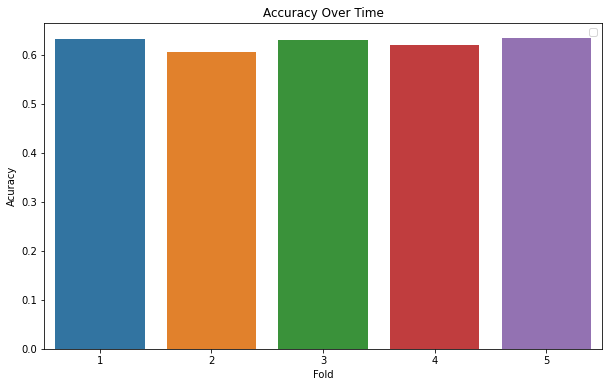

In [ ]:
folds_accu(accu)

In [ ]:
accu

array([0.63134796, 0.60476788, 0.62923463, 0.61919699, 0.6336261 ])

In [ ]:
cm = confusion_matrix(Y_test.values, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 660 1107]
 [ 373 1277]]


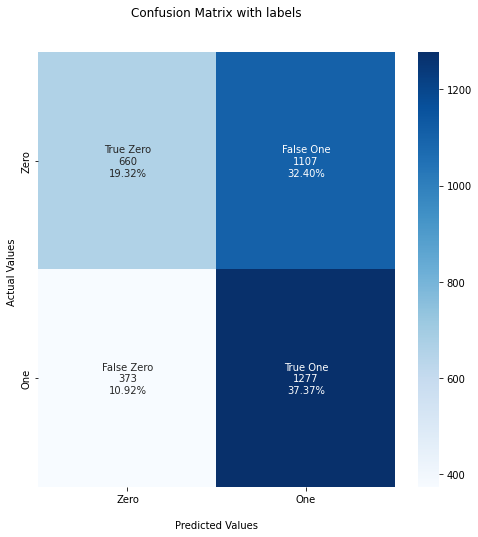

In [ ]:
plot_conf(cm)

In [ ]:
calculate_metrics(cm)

Precision :  0.5356543624161074
Recall :  0.7739393939393939
F1-Score :  0.6331184928111057
Accuracy :  0.5668715247292947


In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.5668715247292947


# Bi-Directional LSTM

In [ ]:
from tensorflow import keras
#Defining the model

def Model_LSTM():
    
    model = Sequential()
    model.add(Input(shape=(11,1)))
    model.add(Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Bidirectional(LSTM(256, return_sequences = True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(128, return_sequences = True)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    return model

[   0    1    2 ... 7968 7969 7970]
Fold #1
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 11, 64)            128       
                                                                 
 bidirectional_23 (Bidirecti  (None, 11, 512)          657408    
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 11, 512)           0         
                                                                 
 bidirectional_24 (Bidirecti  (None, 11, 256)          656384    
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 11, 256)           0         
                                                                 
 flatten_

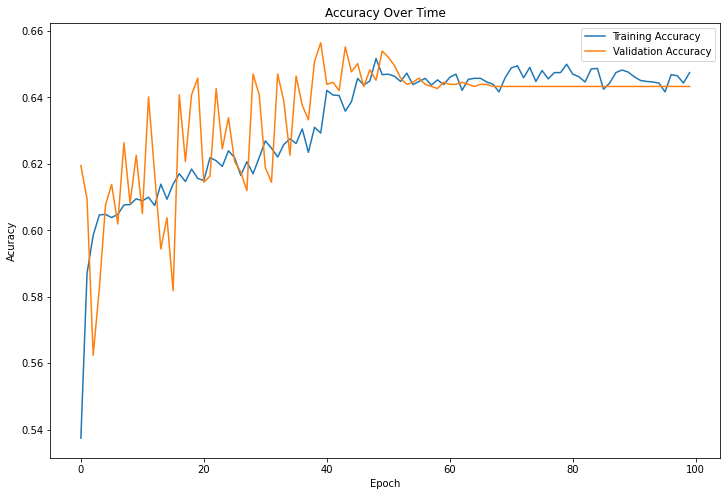

Loss: 0.6363581418991089  Accuracy: 0.6432601809501648


In [ ]:
fold = 0
lossf = np.zeros(5)
accu = np.zeros(5)

for train, test in cv.split(x):
    fold+=1
    if fold>1:
        break
    print(train)
    print(f"Fold #{fold}")
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Model_LSTM()
    
    com_model(model)
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=100, verbose=2, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])
    
    acc = model.evaluate(x_test, y_test)
    
    lossf[fold-1] = acc[0]
    accu[fold-1] = acc[1]
    
    plot_acc(history, 100)
    
    print("Loss:", acc[0], " Accuracy:", acc[1])

In [ ]:
model = Model_LSTM()

ValueError: ignored

In [ ]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
!pip install graphviz
!pip install pydot
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


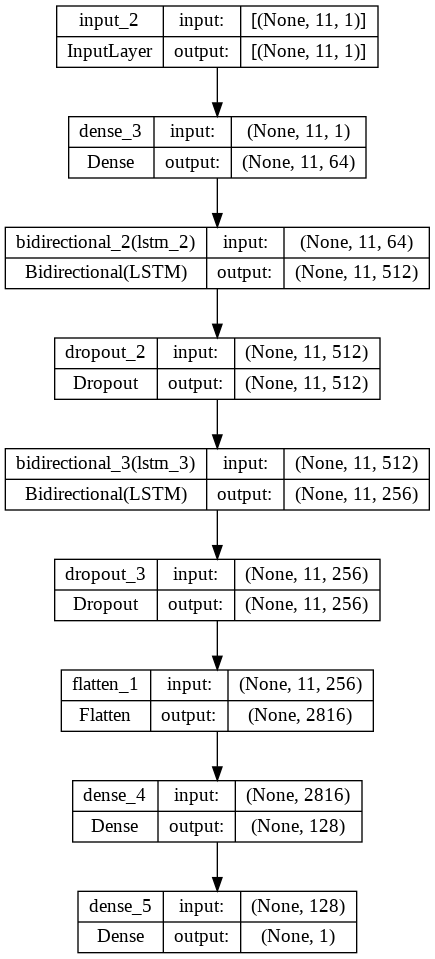

In [ ]:
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model  
from tensorflow.keras.utils import plot_model

In [ ]:
!pip install graphviz
!pip install pydot
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Defining the model
def Model_CNN():
    
    model = Sequential()
    model.add(Conv1D(128, 2, activation="tanh", input_shape=(61,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(5, activation='softmax'))

    model.summary()
    
    return model

In [ ]:
model = Model_CNN()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 60, 128)           384       
                                                                 
 batch_normalization_7 (Batc  (None, 60, 128)          512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 128)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 30, 128)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3840)              0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
com_model(model)

In [ ]:
def com_model(model):
    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import multilabel_confusion_matrix

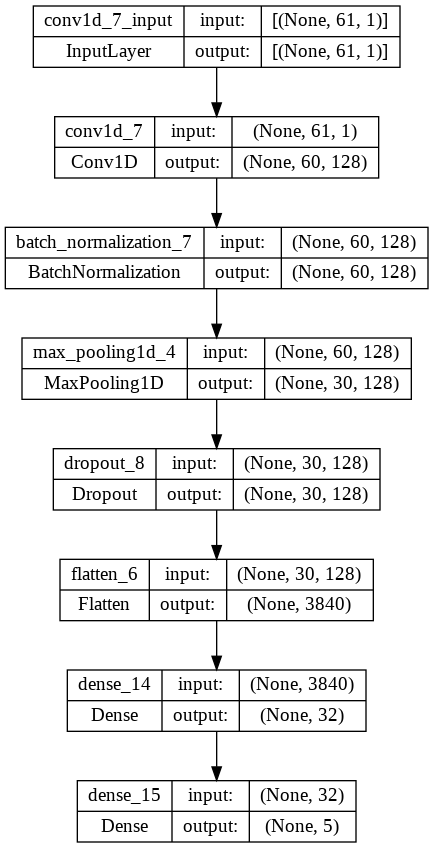

In [ ]:
 plot_model(model, to_file='cnnar.png', show_shapes=True, show_layer_names=True)

In [ ]:
def Model_BiLSTM():
    
    model = Sequential()
    model.add(Input(shape=(61,1)))
    model.add(Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Bidirectional(LSTM(32, return_sequences = True)))
    model.add(Dropout(0.1))
    model.add(Bidirectional(LSTM(32, return_sequences = True)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.summary()
    
    return model

In [ ]:
model = Model_BiLSTM()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 61, 64)            128       
                                                                 
 bidirectional (Bidirectiona  (None, 61, 64)           24832     
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 61, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 61, 64)           24832     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 61, 64)            0         
                                                                 
 flatten_4 (Flatten)         (None, 3904)             

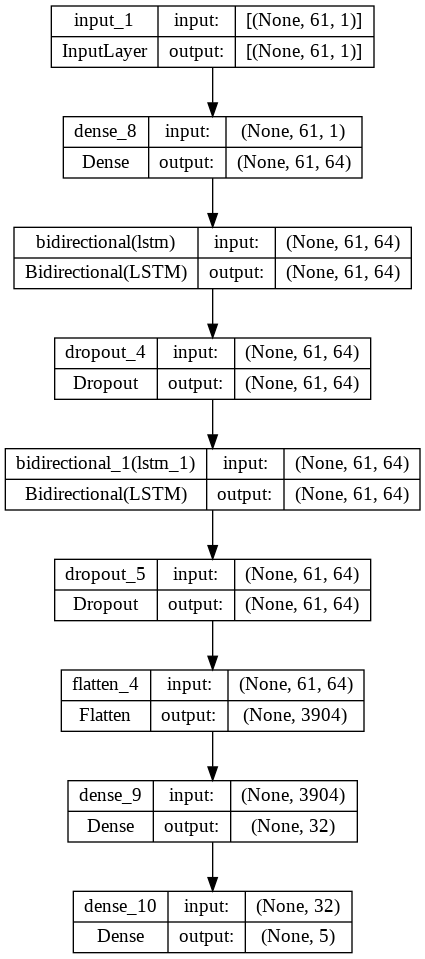

In [ ]:
 plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def Model_LSTM():
    
    model = Sequential()
    model.add(Input(shape=(61,1)))
    model.add(Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(LSTM(32, return_sequences = True))
    model.add(Dropout(0.1))
    model.add(LSTM(32, return_sequences = True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.summary()
    
    return model

In [ ]:
model = Model_LSTM()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 61, 64)            128       
                                                                 
 lstm_2 (LSTM)               (None, 61, 32)            12416     
                                                                 
 dropout_6 (Dropout)         (None, 61, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 61, 32)            8320      
                                                                 
 dropout_7 (Dropout)         (None, 61, 32)            0         
                                                                 
 flatten_5 (Flatten)         (None, 1952)              0         
                                                                 
 dense_12 (Dense)            (None, 32)               

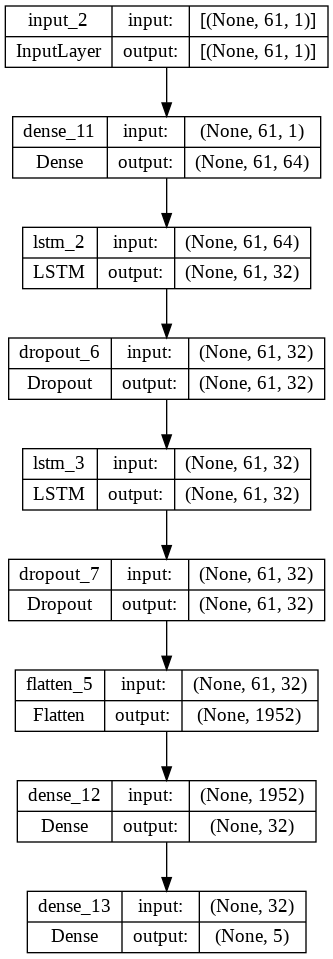

In [ ]:
 plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)